## Predicting the risk of  maternal health via ML models

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from scipy.stats import boxcox
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, classification_report
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
import sklearn.metrics as metrics
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors, metrics
from scipy.spatial import distance
import time;

In [10]:
# Load data
data = pd.read_csv('C:\\Users\\Azmat\\OneDrive\\Desktop\\CDSS\\Maternal Health Risk Data Set 2 (1).csv')
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [11]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [12]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [13]:
data.shape

(1014, 7)

In [14]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

### Data Preprocessing

In [15]:
#Drop duplicates
data.drop_duplicates(keep='first',inplace=True)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB


In [17]:
data.rename(columns={'BS':'BloodSugar'},inplace=True)
data

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


In [18]:
# Define the mapping from labels to numerical values
target_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}

# Create a new column with numerical values based on the mapping
data['numerical_target'] = data['RiskLevel'].map(target_mapping)

# Now, the 'numerical_target' column contains numerical values (0, 1, or 2) based on the labels.

In [19]:
data = data.drop(columns=['RiskLevel'], axis=1)
data.rename(columns={'numerical_target':'RiskLevel'},inplace=True)
data

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,1
674,15,100,60,6.0,98.0,80,0
703,15,100,49,7.6,98.0,77,0
704,12,100,50,6.0,98.0,70,1


### Determining Correlation

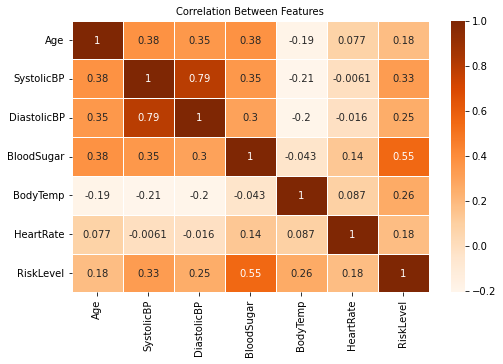

In [21]:
plt.rcParams['figure.figsize']=(8,5)
sns.heatmap(data.corr(),annot=True, linewidths=.5, cmap='Oranges')
plt.title('Correlation Between Features', fontsize=10)
plt.show()

### Histogram

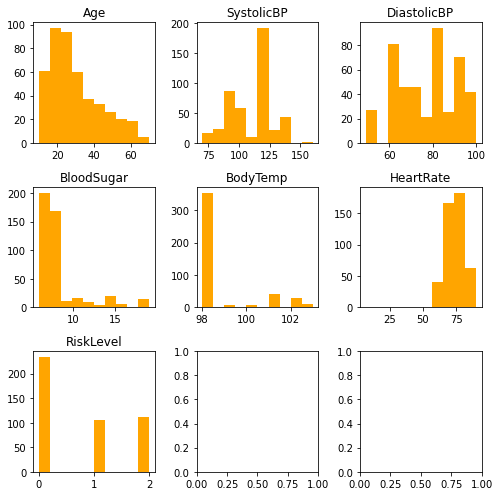

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(7, 7))

# Flatten the axs array for easier indexing
axs = axs.flatten()
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']

for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=10,color=colors[i])
    axs[i].set_title(column)

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

### Boxcox Transformation to remove skewness

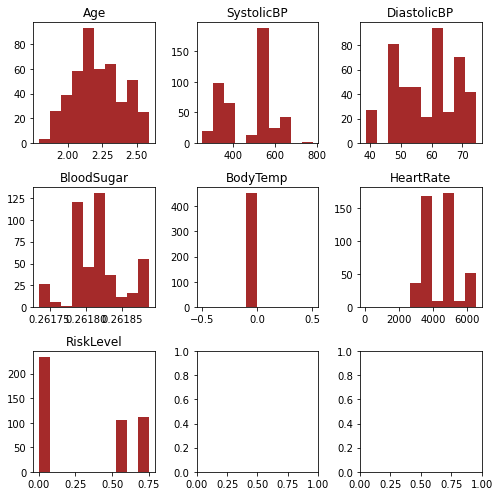

In [23]:
data_boxcox = pd.DataFrame()
for column in data.columns:
    transformed_data, _ = boxcox(data[column] + 1)
    data_boxcox[column] = transformed_data

# Create a 2x2 grid of subplots for the boxplots
fig, axs = plt.subplots(3, 3, figsize=(7, 7))

# Flatten the axs array for easier indexing
axs = axs.flatten()
colors = ['brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown']

for i, column in enumerate(data_boxcox.columns):
    axs[i].hist(data_boxcox[column], bins=10,color=colors[i])
    axs[i].set_title(column)

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

### Boxplot

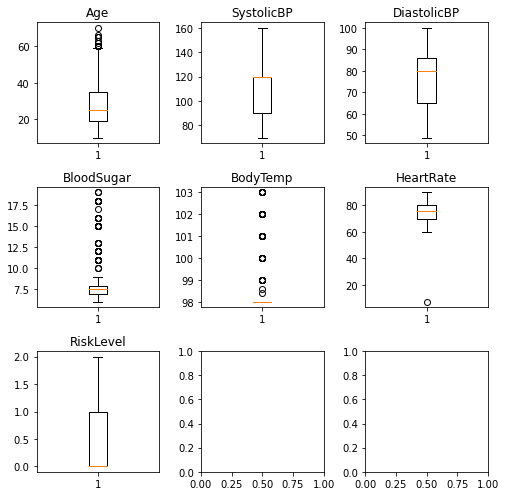

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(7, 7))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Plot boxplots for each column in the DataFrame
for i, column in enumerate(data.columns):
    axs[i].boxplot(data[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

### Spatial Sign Transformation to remove Outliers

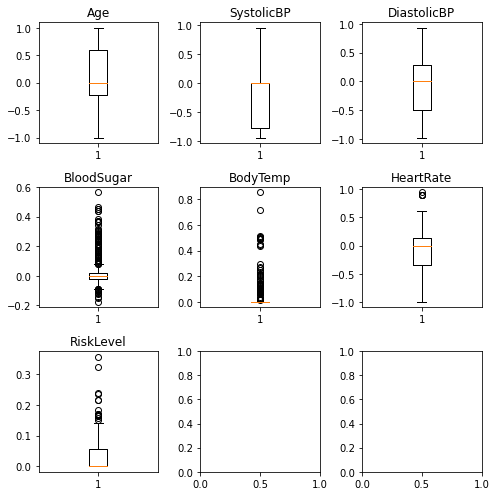

In [25]:
# Calculate the spatial median of the DataFrame
spatial_median = np.median(data, axis=0)

# Calculate the spatial sign of each row in the DataFrame
data_spatial = pd.DataFrame()
for index, row in data.iterrows():
    spatial_sign = row - spatial_median
    spatial_sign /= distance.euclidean(row, spatial_median)
    data_spatial = data_spatial.append(pd.Series(spatial_sign), ignore_index=True)

# Set the column names of the transformed DataFrame
data_spatial.columns = data.columns

fig, axs = plt.subplots(3, 3, figsize=(7, 7))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Plot boxplots for each column in the DataFrame
for i, column in enumerate(data_spatial.columns):
    axs[i].boxplot(data_spatial[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

### Frequency Distribution of Target Variable

0    234
2    112
1    106
Name: RiskLevel, dtype: int64


Text(0, 0.5, 'Count')

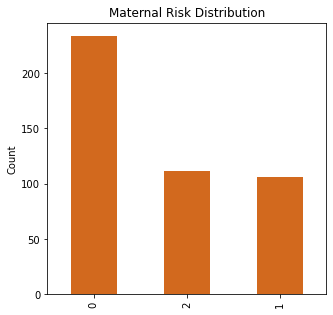

In [26]:
risk_data = data['RiskLevel'].value_counts()
print(risk_data)
plt.figure(figsize=(5,5))
risk_data.plot(kind='bar',color="#D2691E")
plt.title('Maternal Risk Distribution')
plt.ylabel('Count')

### Splitting the data

In [27]:
#creating predictor and response variable
X = data.iloc[:, 0:6]
y = data["RiskLevel"]

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    stratify = y,
                                                    random_state = 42)

### Scaling the data

In [28]:
#scaling the continuous variables
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Model Building 

### 1. kNN model

In [29]:
#initializing the knn model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# calculating the start time
start = time.time()

# train the data using the training data
knn.fit(X_train_scaled, y_train)

# computing the prediction on test data
knn_predict = knn.predict(X_test_scaled)

# calculating the time required by the model
knn_end_time = time.time() - start
print("Computational time:",knn_end_time)

knn_accuracy = accuracy_score(y_test, knn_predict)
print("kNN accuracy:", knn_accuracy)

knn_precision = precision_score(y_test, knn_predict, average='weighted')
print("kNN precision:", knn_precision)

knn_recall = recall_score(y_test, knn_predict, average='weighted')
print("kNN recall:", knn_recall)

knn_f1 = f1_score(y_test, knn_predict, average='weighted')
print("f1:", knn_f1)


print(metrics.classification_report(y_test, knn_predict))


Computational time: 0.02439284324645996
kNN accuracy: 0.6813186813186813
kNN precision: 0.6581416685781012
kNN recall: 0.6813186813186813
f1: 0.6530052516291048
              precision    recall  f1-score   support

           0       0.69      0.91      0.79        47
           1       0.33      0.19      0.24        21
           2       0.88      0.65      0.75        23

    accuracy                           0.68        91
   macro avg       0.64      0.59      0.59        91
weighted avg       0.66      0.68      0.65        91



### Plotting a confusion matrix

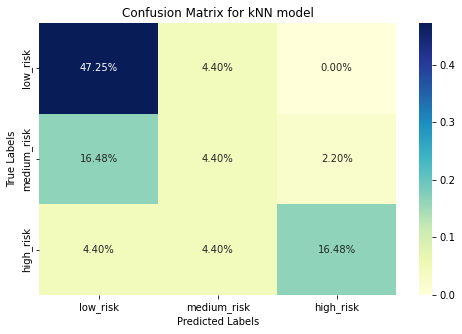

In [30]:
labels = ['low_risk','medium_risk','high_risk']
knn_matrix = confusion_matrix(y_test,knn_predict)

sns.heatmap(knn_matrix/np.sum(knn_matrix), 
            xticklabels=labels, yticklabels=labels,
            fmt='.2%', cmap='YlGnBu',annot=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for kNN model')
plt.show()

In [31]:
# understanding the misclassifications
C = np.empty([3,3])
for i in range(3):
    for j in range(3):
        C[i,j] = np.sum(np.logical_and(y_test==i, knn_predict==j))
print(C)

[[43.  4.  0.]
 [15.  4.  2.]
 [ 4.  4. 15.]]


### Feature Analysis 

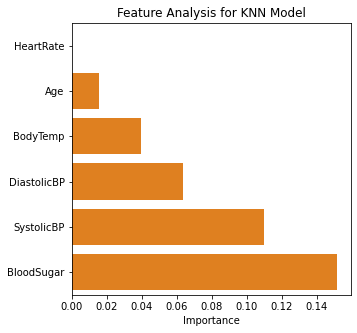

In [32]:
from sklearn.inspection import permutation_importance
# We imported the permutation_importance module from sklearn. 
# The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(knn, X_test_scaled, y_test, n_jobs=-1)
args = feature_importance.importances_mean.argsort()

# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], 
            estimator=sum, orient="h", color= "#FF8000")

plt.xlabel('Importance')
plt.title('Feature Analysis for KNN Model')
plt.show();

### 2. Random Forest

In [33]:
rf = RandomForestClassifier(max_depth=5, random_state=5)

# calculating the start time
start = time.time()

# train the data using the training data
rf.fit(X_train_scaled, y_train)

# computing the prediction on test data
rf_predict = rf.predict(X_test_scaled)

# calculating the time required by the model
rf_end_time = time.time() - start
print("Computational time:",rf_end_time)

rf_accuracy = accuracy_score(y_test, rf_predict)
print("rf accuracy:", rf_accuracy)

rf_precision = precision_score(y_test, rf_predict, average='weighted')
print("rf precision:", rf_precision)

rf_recall = recall_score(y_test, rf_predict, average='weighted')
print("rf recall:", rf_recall)

rf_f1 = f1_score(y_test, rf_predict, average='weighted')
print("f1:", rf_f1)


print(metrics.classification_report(y_test, rf_predict))

Computational time: 0.44407153129577637
rf accuracy: 0.7252747252747253
rf precision: 0.6805613741097613
rf recall: 0.7252747252747253
f1: 0.6781026313136406
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        47
           1       0.43      0.14      0.21        21
           2       0.82      0.78      0.80        23

    accuracy                           0.73        91
   macro avg       0.66      0.63      0.61        91
weighted avg       0.68      0.73      0.68        91



### Plotting a confusion matrix

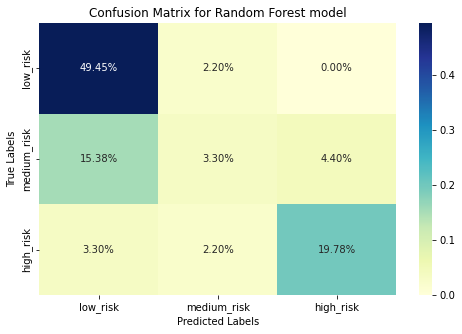

In [34]:
labels = ['low_risk','medium_risk','high_risk']
rf_matrix = confusion_matrix(y_test, rf_predict)

sns.heatmap(rf_matrix/np.sum(rf_matrix), 
            xticklabels=labels, yticklabels=labels,
            fmt='.2%', cmap='YlGnBu',annot=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest model')
plt.show()

In [35]:
# understanding the misclassifications
C = np.empty([3,3])
for i in range(3):
    for j in range(3):
        C[i,j] = np.sum(np.logical_and(y_test==i, rf_predict==j))
print(C)

[[45.  2.  0.]
 [14.  3.  4.]
 [ 3.  2. 18.]]


### Feature Analysis 

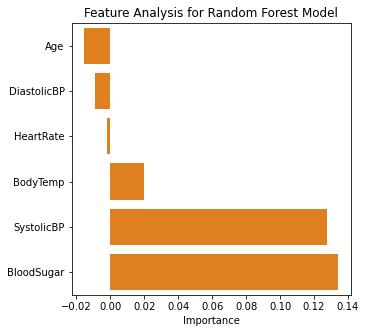

In [36]:
from sklearn.inspection import permutation_importance
# We imported the permutation_importance module from sklearn. 
# The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(rf, X_test_scaled, y_test, n_jobs=-1)
args = feature_importance.importances_mean.argsort()

# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], 
            estimator=sum, orient="h", color= '#FF8000')

plt.xlabel('Importance')
plt.title('Feature Analysis for Random Forest Model')
plt.show();

### 3. AdaBoost

In [37]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=5)

# calculating the start time
start = time.time()

# train the data using the training data
adaboost.fit(X_train_scaled, y_train)

# computing the prediction on test data
adaboost_predict = adaboost.predict(X_test_scaled)

# calculating the time required by the model
adaboost_end_time = time.time() - start
print("Computational time:",adaboost_end_time)

adaboost_accuracy = accuracy_score(y_test, adaboost_predict)
print("adaboost accuracy:", adaboost_accuracy)

adaboost_precision = precision_score(y_test, adaboost_predict, average='weighted')
print("adaboost precision:", adaboost_precision)

adaboost_recall = recall_score(y_test, adaboost_predict, average='weighted')
print("adaboost recall:", adaboost_recall)

adaboost_f1 = f1_score(y_test, adaboost_predict, average='weighted')
print("adaboost f1:", adaboost_f1)


print(metrics.classification_report(y_test, adaboost_predict))

Computational time: 0.1187129020690918
adaboost accuracy: 0.6153846153846154
adaboost precision: 0.6200733790019504
adaboost recall: 0.6153846153846154
adaboost f1: 0.6172951895106118
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        47
           1       0.27      0.29      0.28        21
           2       0.71      0.65      0.68        23

    accuracy                           0.62        91
   macro avg       0.57      0.56      0.57        91
weighted avg       0.62      0.62      0.62        91



### Plotting the confusion matrix

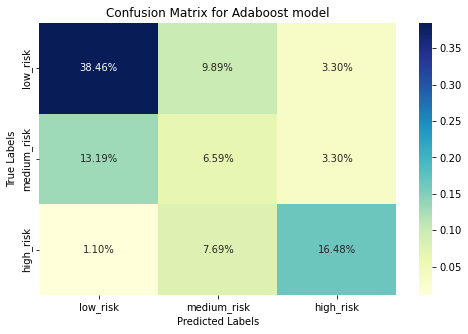

In [38]:
labels = ['low_risk','medium_risk','high_risk']
adaboost_matrix = confusion_matrix(y_test, adaboost_predict)

sns.heatmap(adaboost_matrix/np.sum(adaboost_matrix), 
            xticklabels=labels, yticklabels=labels,
            fmt='.2%', cmap='YlGnBu',annot=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Adaboost model')
plt.show()

In [39]:
# understanding the misclassifications
C = np.empty([3,3])
for i in range(3):
    for j in range(3):
        C[i,j] = np.sum(np.logical_and(y_test==i, adaboost_predict==j))
print(C)

[[35.  9.  3.]
 [12.  6.  3.]
 [ 1.  7. 15.]]


### Feature Analysis

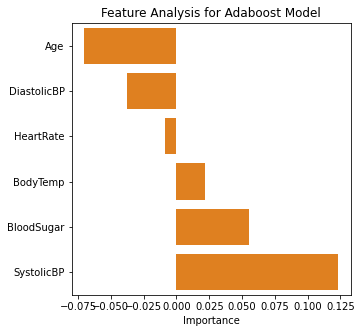

In [40]:
from sklearn.inspection import permutation_importance
# We imported the permutation_importance module from sklearn. 
# The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(adaboost, X_test_scaled, y_test, n_jobs=-1)
args = feature_importance.importances_mean.argsort()

# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], 
            estimator=sum, orient="h", color='#FF8000' )

plt.xlabel('Importance')
plt.title('Feature Analysis for Adaboost Model')
plt.show();

### GradientBoost

In [58]:
gradientBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                           max_depth=3, random_state=5)

# calculating the start time
start = time.time()

# train the data using the training data
gradientBoost.fit(X_train_scaled, y_train)

# computing the prediction on test data
gradientBoost_predict = gradientBoost.predict(X_test_scaled)

# calculating the time required by the model
gradientBoost_end_time = time.time() - start
print("Computational time:",gradientBoost_end_time)

gradientBoost_accuracy = accuracy_score(y_test, gradientBoost_predict)
print("gradientBoost accuracy:", gradientBoost_accuracy)

gradientBoost_precision = precision_score(y_test, gradientBoost_predict, average='weighted')
print("gradientBoost precision:", gradientBoost_precision)

gradientBoost_recall = recall_score(y_test, gradientBoost_predict, average='weighted')
print("gradientBoost recall:", gradientBoost_recall)

gradientBoost_f1 = f1_score(y_test, gradientBoost_predict, average='weighted')
print("gradientBoost f1:", gradientBoost_f1)


print(metrics.classification_report(y_test, gradientBoost_predict))

Computational time: 0.41658520698547363
gradientBoost accuracy: 0.6483516483516484
gradientBoost precision: 0.6297391923802488
gradientBoost recall: 0.6483516483516484
gradientBoost f1: 0.6378807595912859
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        47
           1       0.29      0.24      0.26        21
           2       0.68      0.74      0.71        23

    accuracy                           0.65        91
   macro avg       0.58      0.59      0.58        91
weighted avg       0.63      0.65      0.64        91



## Plotting the confusion matrix

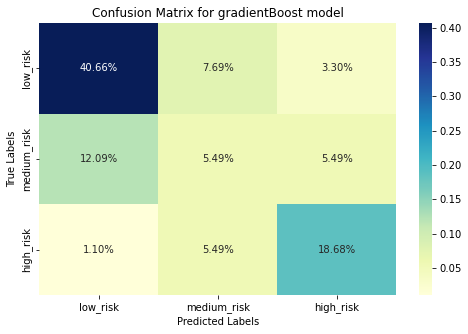

In [56]:
labels = ['low_risk','medium_risk','high_risk']
gradientBoost_matrix = confusion_matrix(y_test, gradientBoost_predict)

sns.heatmap(gradientBoost_matrix/np.sum(gradientBoost_matrix), 
            xticklabels=labels, yticklabels=labels,
            fmt='.2%', cmap='YlGnBu',annot=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for gradientBoost model')
plt.show()

## Feature Analysis

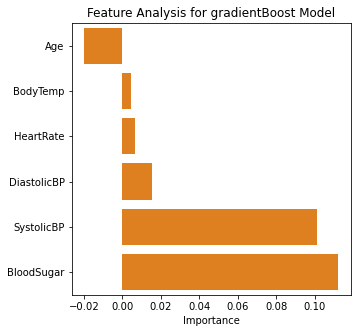

In [42]:
from sklearn.inspection import permutation_importance
# We imported the permutation_importance module from sklearn. 
# The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(gradientBoost, X_test_scaled, y_test, n_jobs=-1)
args = feature_importance.importances_mean.argsort()

# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], 
            estimator=sum, orient="h", color='#FF8000' )

plt.xlabel('Importance')
plt.title('Feature Analysis for gradientBoost Model')
plt.show();

## Explainability with LIME

In [57]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
from sklearn.pipeline import Pipeline
from joblib import dump, load

sc = load('scaler.joblib')


pipe_rf = Pipeline([('scaler', sc),
                     ('rf', rf)])
# LIME explanation
explainer = LimeTabularExplainer(training_data=X_train.values, mode="classification", feature_names = X_train.columns ,class_names=['low risk', 'mid risk', 'high risk'])
instance_idx = 0  # You can choose any instance from the test data for explanation
explanation = explainer.explain_instance(X_test.values[instance_idx], pipe_rf.predict_proba, top_labels = 3, num_features=6)

# Print the LIME explanation
explanation.show_in_notebook()

## Summary of Model Performance

In [45]:
summary =  pd.DataFrame({"Classifier":["kNN", "Random Forest", "Adaboost", "Gradient Boost"],
                 "Computational Time": [knn_end_time,rf_end_time, adaboost_end_time, gradientBoost_end_time],
                 "Accuracy":[knn_accuracy, rf_accuracy, adaboost_accuracy, gradientBoost_accuracy],
                 "Precison":[knn_precision, rf_precision, adaboost_precision, gradientBoost_precision],
                 "Recall":[knn_recall, rf_recall, adaboost_recall, gradientBoost_recall],
                 "F1-score":[knn_f1, rf_f1, adaboost_f1, gradientBoost_f1],
                 })
summary

,Classifier,Computational Time,Accuracy,Precison,Recall,F1-score
0,kNN,0.024393,0.681319,0.658142,0.681319,0.653005
1,Random Forest,0.211881,0.725275,0.680561,0.725275,0.678103
2,Adaboost,0.118713,0.615385,0.620073,0.615385,0.617295
3,Gradient Boost,0.424530,0.648352,0.629739,0.648352,0.637881


## Integrating best model with GUI

In [46]:

from joblib import dump, load


In [47]:
sc = StandardScaler()
sc.fit(X_train)
X_test_scaled = sc.transform(X_test)

In [48]:
sc = StandardScaler()
sc.fit(X_train)

dump(sc, 'scaler.joblib')

['scaler.joblib']

In [49]:
sc = load('scaler.joblib')
sc.transform(X_test)

array([[ 1.88497186,  1.65062337,  1.78675833,  3.31412536, -0.48442967,
         1.91050233],
       [ 0.9353022 ,  0.52495031,  0.33482866, -0.16692546, -0.48442967,
        -0.50396062],
       [ 0.42394161, -0.60072276, -0.39113618, -0.51158396, -0.48442967,
        -1.71119209],
       [-0.45267655, -0.60072276,  0.69781108, -0.44265226, -0.48442967,
        -0.98685321],
       [-0.89098563, -1.16355929, -0.7541186 , -0.30478886,  3.12877508,
        -0.86613006],
       [-1.25624319,  0.52495031,  1.42377591, -0.54604981, -0.48442967,
        -1.71119209],
       [ 0.42394161,  0.52495031,  0.33482866, -0.30478886, -0.48442967,
         0.70327086],
       [-0.30657352,  1.65062337,  1.78675833, -0.30478886, -0.48442967,
         0.70327086],
       [-1.25624319, -1.16355929, -1.11710102, -0.20139131,  2.40613413,
        -1.71119209],
       [-0.7448826 , -1.16355929, -0.39113618, -0.23585716, -0.48442967,
         0.70327086],
       [-0.52572806, -1.44497756, -1.11710102, -0.

In [50]:
dump(rf, 'finalModel.joblib')

['finalModel.joblib']

In [51]:
clf = load('finalModel.joblib')

In [52]:
rf_predict = clf.predict(X_test_scaled)
rf_predict

array([2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 1, 2], dtype=int64)